# Classified Data - K-Nearest Neighbors

The data used for this notebook is classified by the company. Moreover, they have hidden the feature column names but given the data and the target classes. 

In this notebook I will try to use K-Nearest Neigbors to create a model that directly predicts a class for a new data point based off of the features.

### Import the Libraries

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Get the Data

In [31]:
df = pd.read_csv('Classified Data')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


The data has no null values in any of the columns, and there are 12 columns in total. We have no idea yet what the columns stand for, but there is a target class column 1 or 0. 

### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

The transform method performs standardisation by centering and scaling. 

In [36]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [37]:
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

<code>scaled_features</code> now shows an array of values, these are the scaled versions of the actual values. These values are relatively close to each other. Now I will create a feature dataframe, but not adding the target column to this new df. 

In [38]:
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [39]:
df_scaled.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Now there is a standard scale or standardised version of the data. This data can be used to put into the kNN algorithm, which depends on the distance between each feature. 

### Split the dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_scaled
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

As a start, K=1

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
kNN = KNeighborsClassifier(n_neighbors=1)

Firstly, the training data will be passed  into the kNN model

In [44]:
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Secondly, some predictions will be grabbed to evaluate the model.

In [45]:
predictions = kNN.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

### Evaluation of the kNN model

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[145  14]
 [ 12 129]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.90      0.91      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



According to these values, the model performed well. But I will explore if there is a better value for K. The elbow method can be used for this. This means as many models as possible will be iterated and their error rate will be plotted. The one with the lowest error rate will be the best choice. 

As a first step, an empty list called <code>error_rate</code> will be created with the error rates filled in later.

In [48]:
error_rate = []

for i in range(1,40):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, y_train)
    predictions_i = kNN.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

Text(0, 0.5, 'Error Rate')

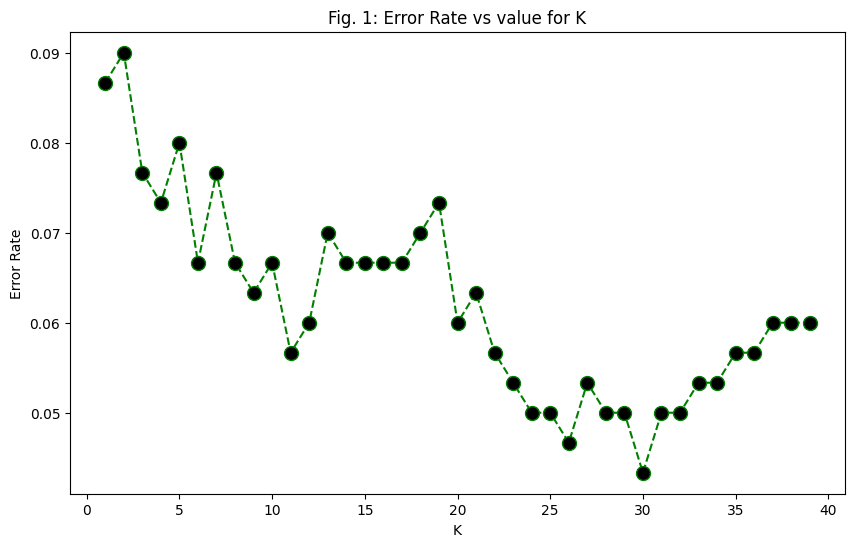

In [49]:
from matplotlib.lines import lineStyles


plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('Fig. 1: Error Rate vs value for K')
plt.xlabel('K')
plt.ylabel('Error Rate')

According to Fig. 1 the error rate starts with a higher rate for K < 3 but eventually goes down after K = 20. Important to note is that the error rate is already quite low, this is why the figure looks quite bumpy.

In [58]:
kNN17 = KNeighborsClassifier(n_neighbors=17)

In [59]:
kNN17.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [61]:
predictions17 = kNN17.predict(X_test)

In [62]:
print(confusion_matrix(y_test, predictions17))
print(classification_report(y_test, predictions17))

[[150   9]
 [ 11 130]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       159
           1       0.94      0.92      0.93       141

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In the confusion matrix of when K = 17 you can see that the accuracy increases. 